**Online Payment Fraud Detection using Machine Learning in Python**

As we are approaching modernity, the trend of paying online is increasing tremendously. It is very beneficial for the buyer to pay online as it saves time, and solves the problem of free money. Also, we do not need to carry cash with us. But we all know that Good thing are accompanied by bad things.

The online payment method leads to fraud that can happen using any payment app. That is why Online Payment Fraud Detection is very important.

Online Payment Fraud Detection using Machine Learning in Python
Here we will try to solve this issue with the help of machine learning in Python.

The dataset we will be using have these columns - 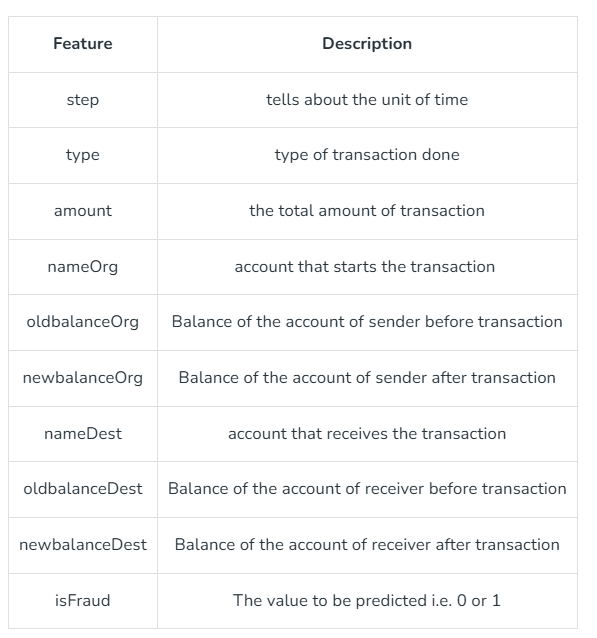

Importing Libraries and Datasets
The libraries used are :

Pandas:  This library helps to load the data frame in a 2D array format and has multiple functions to perform analysis tasks in one go.

Seaborn/Matplotlib: For data visualization.

Numpy: Numpy arrays are very fast and can perform large computations in a very short time.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The dataset includes the features like type of payment, Old balance , amount paid, name of the destination, etc.

In [ ]:
data = pd.read_csv('new_data.csv')
data.head()

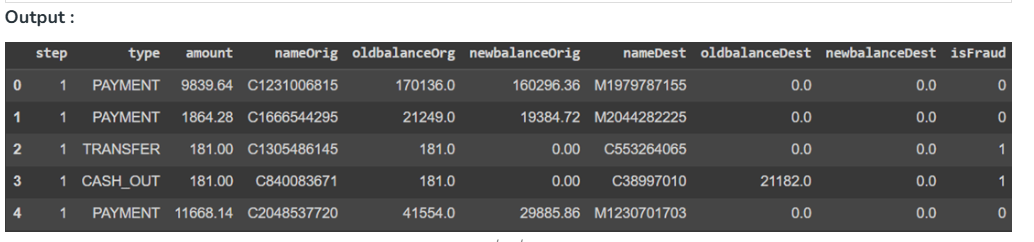

To print the information of the data we can use data.info() command.

In [ ]:
data.info()

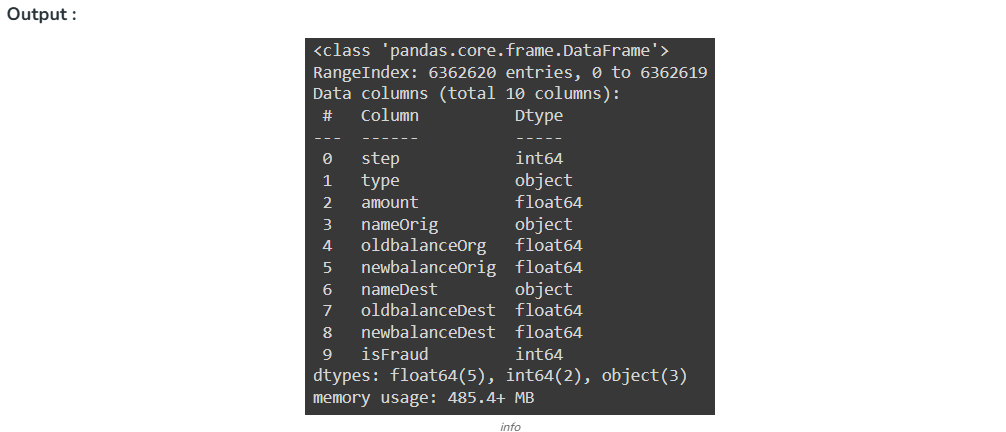

Let's see the mean, count , minimum and maximum values of the data.

In [ ]:
data.describe()

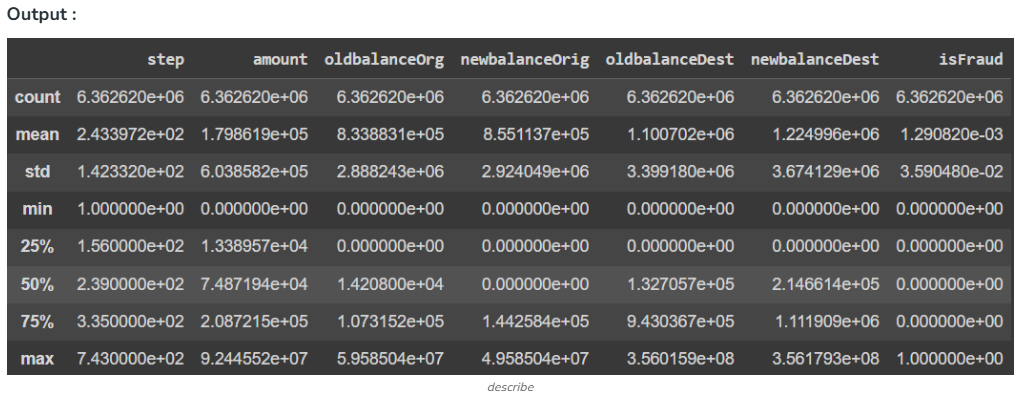

Data Visualization
In this section, we will try to understand and compare all columns.

Let's count the columns with different datatypes like Category, Integer, Float.

In [ ]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

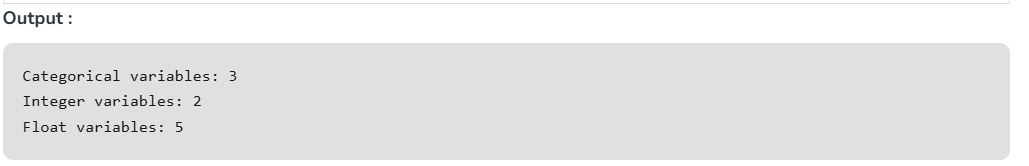

Let's see the count plot of the Payment type column using Seaborn library.

In [ ]:
sns.countplot(x='type', data=data)

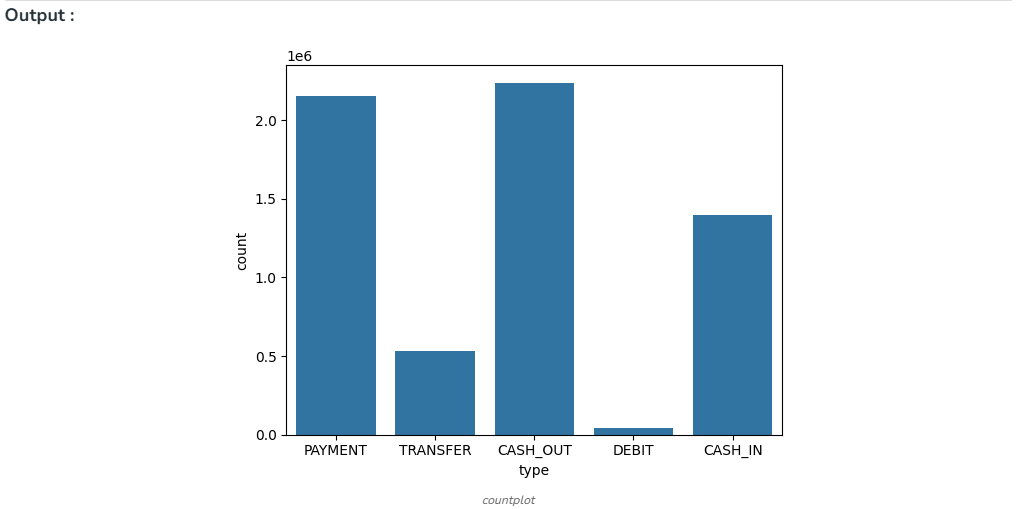

We can also use the bar plot for analyzing Type and amount column simultaneously.

In [ ]:
sns.barplot(x='type', y='amount', data=data)

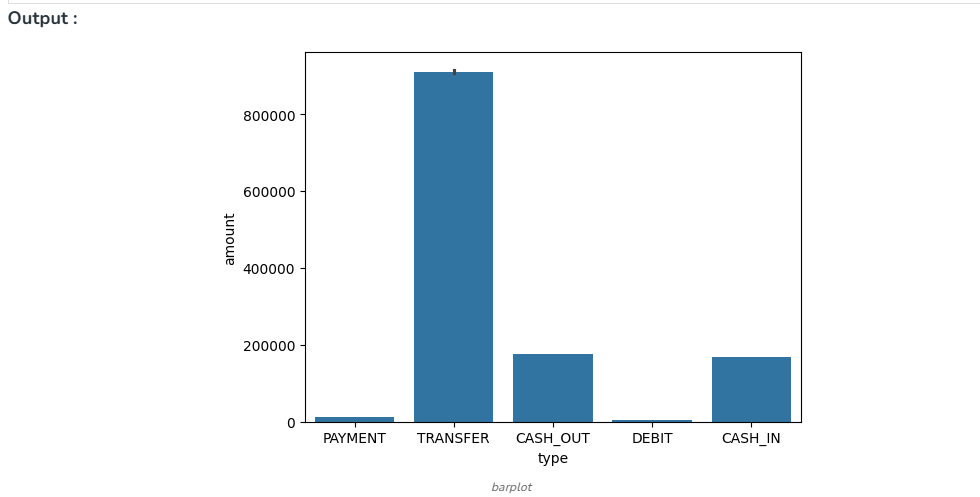

Both the graph clearly shows that mostly the type cash_out and transfer are maximum in count and as well as in amount.

Let's check the distribution of data among both the prediction values.

In [ ]:
data['isFraud'].value_counts()

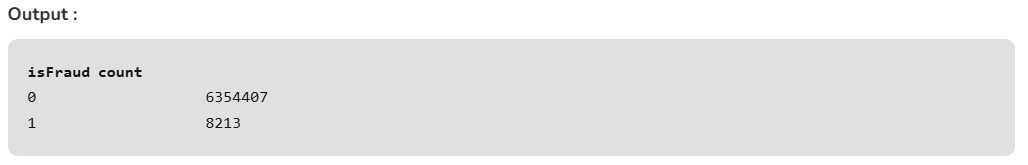

The dataset is already in same count. So there is no need of sampling.

Now let's see the distribution of the step column using distplot.

In [ ]:
plt.figure(figsize=(15, 6))
sns.distplot(data['step'], bins=50)

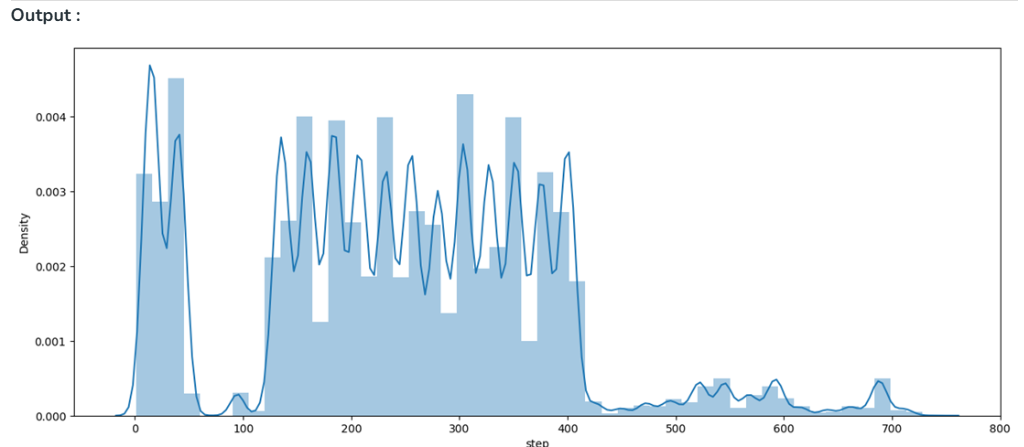

The graph shows the maximum distribution among 200 to 400 of step.

Now, Let's find the correlation among different features using Heatmap.

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.apply(lambda x: pd.factorize(x)[0]).corr(),
			cmap='BrBG',
			fmt='.2f',
			linewidths=2,
			annot=True)

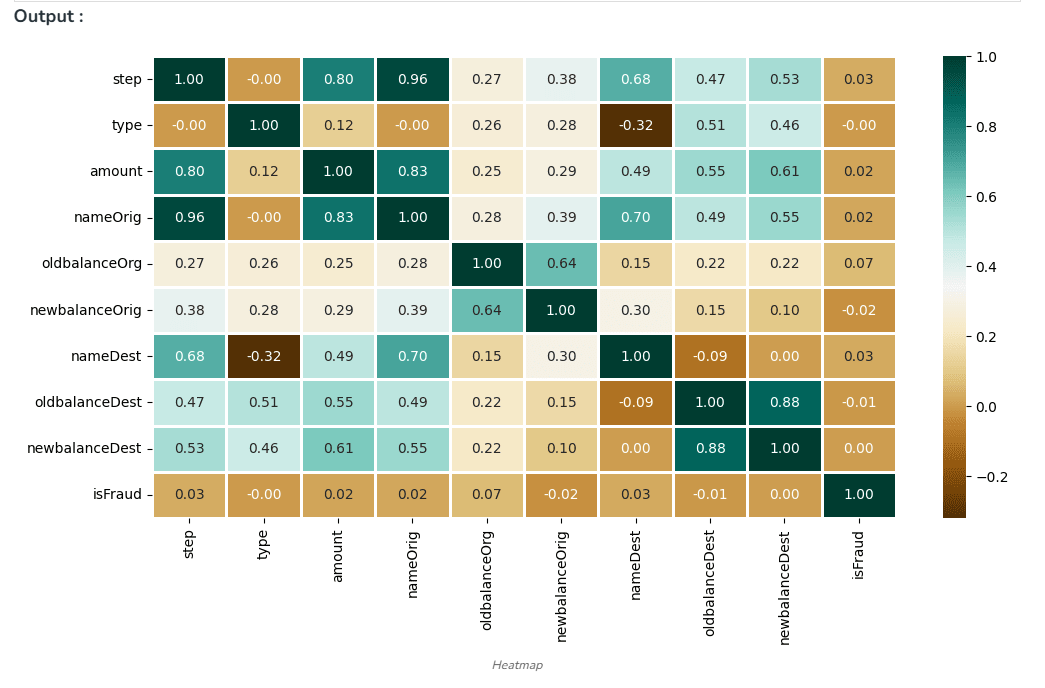

Data Preprocessing
This step includes the following :

Encoding of Type column
Dropping irrelevant columns like nameOrig, nameDest
Data Splitting

In [ ]:
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()

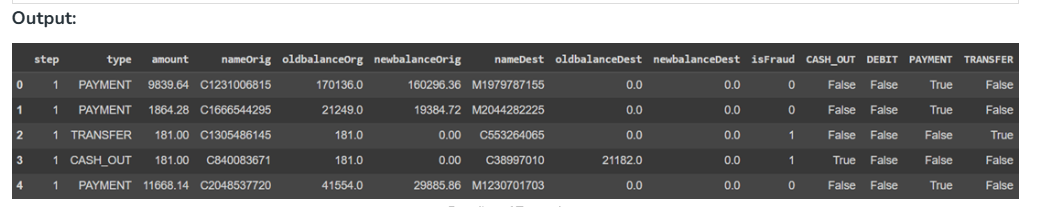

Once we done with the encoding, now we can drop the irrelevant columns. For that, follow the code given below.

In [ ]:
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']

Let's check the shape of extracted data.

In [ ]:
X.shape, y.shape

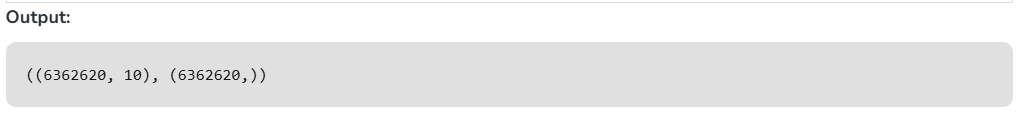

Now let's split the data into 2 parts : Training and Testing.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

Model Training
As the prediction is a classification problem so the models we will be using are :

**LogisticRegression** :  It predicts that the probability of a given data belongs to the particular category or not.

**XGBClassifier** : It refers to Gradient Boosted decision trees. In this algorithm, decision trees are created in sequential form and weights are assigned to all the independent variables which are then fed into the decision tree which predicts results.

**SVC** : SVC is used to find a hyperplane in an N-dimensional space that distinctly classifies the data points. Then it gives the output according the most nearby element.

**RandomForestClassifier** : Random forest classifier creates a set of decision trees from a randomly selected subset of the training set. Then, it collects the votes from different decision trees to decide the final prediction.

Let's import the modules of the relevant models.

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

Once done with the importing, Let's train the model.

In [ ]:
models = [LogisticRegression(), XGBClassifier(),
          RandomForestClassifier(n_estimators=7,
                                 criterion='entropy',
                                 random_state=7)]

for i in range(len(models)):
    models[i].fit(X_train, y_train)
    print(f'{models[i]} : ')

    train_preds = models[i].predict_proba(X_train)[:, 1]
    print('Training Accuracy : ', ras(y_train, train_preds))

    y_preds = models[i].predict_proba(X_test)[:, 1]
    print('Validation Accuracy : ', ras(y_test, y_preds))
    print()

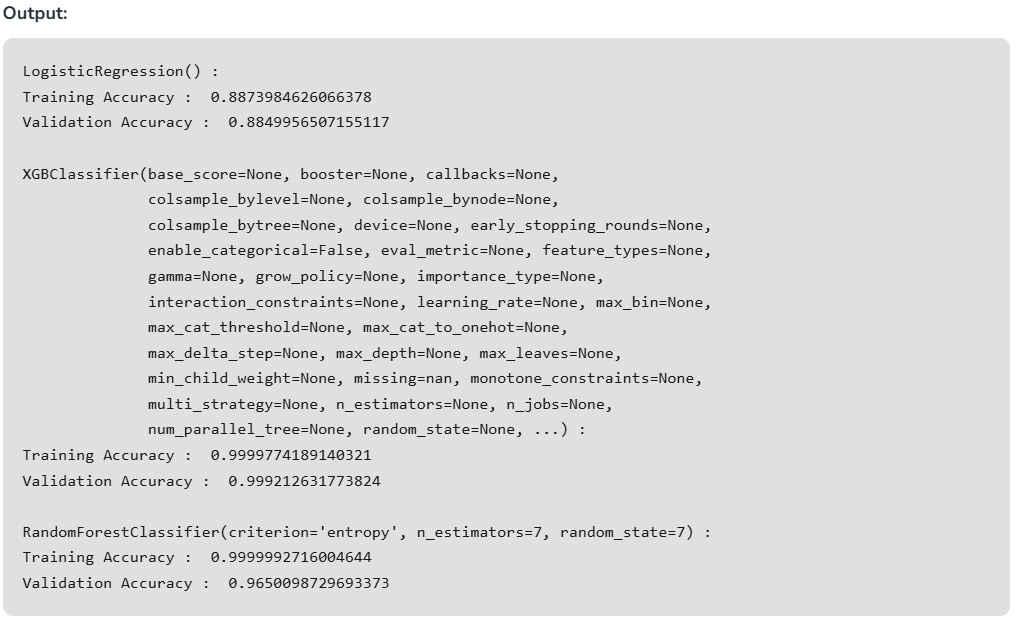

**Model Evaluation-**

The best-performed model is XGBClassifier. Let's plot the Confusion Matrix for the same.

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = ConfusionMatrixDisplay.from_estimator(models[1], X_test, y_test)

cm.plot(cmap='Blues')

plt.show()

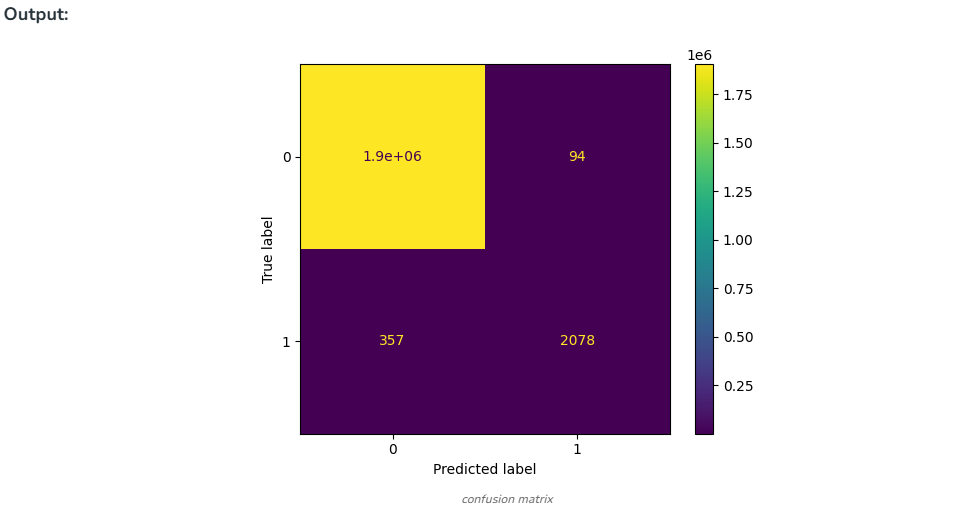

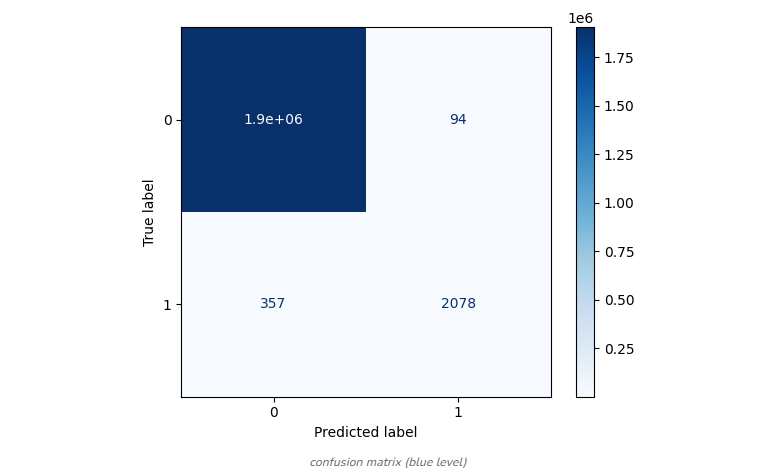